<a href="https://colab.research.google.com/github/reemf123/SDS-384-Final-Project/blob/main/Reem_Lung_Cancer_vs_Non_Cancer_Detection_Team_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lung Cancer vs. NonCancer Detection 
--------------------------------------------------------------------------------
Fashho R., Nowacki A., & Shukla S.

--------------------------------------------------------------------------------
GOAL: compare four different algorithms for (1) identifying the location of a nodule within a lung CT scan and (2) calculating the probability ("how sure is this algorithm") that the tissue identified as a lung nodule is, indeed, a lung nodule.

--------------------------------------------------------------------------------

### Table of Contents:
* Google Drive Authorization
* Kaggle Data Import
* Data Pre-Processing
* Data Visualization
* Annotations for LUNA16 Data
* Split of Data into Train and Test
* Model 01: Support Vector Machine (SVM)
* Model 02: 2D CNN
* Model 03: UNet
* Model 04: VGG
* Comparison of Models

# Google Drive Authorization:
-------------------------------------------
Included in this section:
*   
-------------------------------------------
Output:


-------------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import imageio
import matplotlib.image as mpimg
import requests, io
import cv2
import fnmatch
import functools
import itertools
import glob
import seaborn as sns

In [ ]:
! pip install -Uq kaggle
! pip install -Uq fastai==2.2.5

In [ ]:
# Load Authentication File - https://www.kaggle.com/general/51898
# How to load authetication key - https://www.kaggle.com/docs/api
from google.colab import files 
files.upload()

# Kaggle Data Import:


In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 777 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d mohamedhanyyy/chest-ctscan-images

100% 119M/119M [00:00<00:00, 166MB/s] 
100% 119M/119M [00:00<00:00, 150MB/s]


In [ ]:
! mkdir chest-ctscan-images
! unzip -qq chest-ctscan-images.zip -d chest-ctscan-images
# -qq disables display of long list 

# Data Pre-Processing:


In [ ]:
# import test, train, and validation folders:
import skimage

In [ ]:
# import Simple ITK to read .mhd files:
!pip install SimpleITK
import SimpleITK as sitk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 12.4 MB/s eta 0:00:00


In [ ]:
# initialize folder path (change as necessary):
dir = '/content/chest-ctscan-images/Data/test/adenocarcinoma'

# initialize counting variable:
count = 0

# find files there are in one folder:
for filename in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, filename)):
        count = len(fnmatch.filter(os.listdir(dir), '*.png')) # .png or .jpg
        count_ac = count
      
print("The number of adenocarcinoma files in the TEST folder =", count)

The number of adenocarcinoma files in the TEST folder = 120


In [ ]:
# initialize folder path (change as necessary):
dir = '/content/chest-ctscan-images/Data/test/large.cell.carcinoma'

# reset count:
count = 0

for filename in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, filename)):
        count = len(fnmatch.filter(os.listdir(dir), '*.png')) # .png or .jpg
        count_lcc = count
    
print("The number of large cell carcinoma files in the TEST folder =", count)

The number of large cell carcinoma files in the TEST folder = 51


In [ ]:
# initialize folder path (change as necessary):
dir = '/content/chest-ctscan-images/Data/test/normal'

# reset count:
count = 0

for filename in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, filename)):
        count = len(fnmatch.filter(os.listdir(dir), '*.png')) # .png or .jpg
        count_n = count
    
print("The number of non-cancerous files in the TEST folder =", count)

The number of non-cancerous files in the TEST folder = 54


In [ ]:
# initialize folder path (change as necessary):
dir = '/content/chest-ctscan-images/Data/test/squamous.cell.carcinoma'

# reset count:
count = 0

for filename in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, filename)):
        count = len(fnmatch.filter(os.listdir(dir), '*.png')) # .png or .jpg
        count_scc = count
    
print("The number of squamous cell carcinoma files in the TEST folder =", count)

The number of squamous cell carcinoma files in the TEST folder = 90


In [ ]:
print("The total number of TEST files = ", count_ac + count_lcc + count_n + count_scc)

The total number of TEST files =  315


In [ ]:
# initialize arrays:
dir = '/content/chest-ctscan-images/Data/test/adenocarcinoma'

count = 0
# pull out only .mhd files:
for filename in glob.glob(os.path.join(dir, '*.png')):
    tempVar = cv2.imread(filename)
    test_ac = tempVar
    count = count + 1

Text(0.5, 1.0, '/content/chest-ctscan-images/Data/test/adenocarcinoma/000171 (5).png')

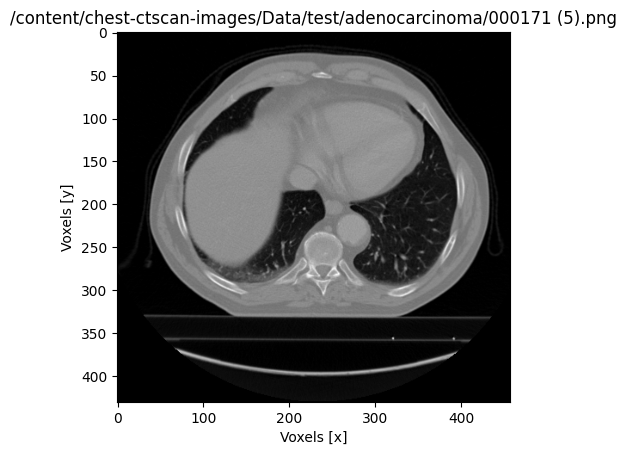

In [ ]:
# Output img with window name as 'image'
plt.imshow(tempVar)
plt.xlabel('Voxels [x]')
plt.ylabel('Voxels [y]')
plt.title(filename)

In [ ]:
# for training data:
# initialize folder path (change as necessary):
dir = '/content/chest-ctscan-images/Data/train/'

# reset count:
count = 0

for filename in os.listdir(dir):
    if os.path.isfile(os.path.join(dir, filename)):
        count = len(fnmatch.filter(os.listdir(dir), '*.png')) # .png or .jpg
        count_scc = count
    
print("The number of files in the TRAIN folder =", count_scc)

The number of files in the TRAIN folder = 90


# **Visulizations**

In [ ]:
# Set directories
test_dir = "/content/chest-ctscan-images/Data/test"
train_dir = "/content/chest-ctscan-images/Data/train"
valid_dir = "/content/chest-ctscan-images/Data/valid"

In [ ]:
# train sets
for files in os.listdir(train_dir):
    print(os.path.join(train_dir,files))

print('\n')
# valid sets
for files in os.listdir(valid_dir):
    print(os.path.join(valid_dir,files))

print('\n')
# test sets
for files in os.listdir(test_dir):
    print(os.path.join(test_dir,files))

/content/chest-ctscan-images/Data/train/normal
/content/chest-ctscan-images/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
/content/chest-ctscan-images/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
/content/chest-ctscan-images/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib


/content/chest-ctscan-images/Data/valid/normal
/content/chest-ctscan-images/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa
/content/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa
/content/chest-ctscan-images/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib


/content/chest-ctscan-images/Data/test/normal
/content/chest-ctscan-images/Data/test/large.cell.carcinoma
/content/chest-ctscan-images/Data/test/adenocarcinoma
/content/chest-ctscan-images/Data/test/squamous.cell.carcinoma


In [ ]:
# Adapted from MATTISON HINELINE - https://www.kaggle.com/code/mattison/chest-ct-scan-exploratory-analysis/notebook
train_val_images = []
for folder in os.listdir(train_dir):
    for file in os.listdir(os.path.join(train_dir,folder)): 
        image_arr = cv2.imread(os.path.join(train_dir,folder,file))
        train_val_images.append({'image':file, 
                       'type':folder, 
                       'image_dimensions':image_arr.shape,
                       'image_height':image_arr.shape[0],
                       'image_width':image_arr.shape[1],
                       'image_channels':image_arr.shape[2],
                       'set':'train'})
        
for folder in os.listdir(valid_dir):
    for file in os.listdir(os.path.join(valid_dir,folder)): 
        image_arr = cv2.imread(os.path.join(valid_dir,folder,file))
        train_val_images.append({'image':file, 
                       'type':folder, 
                       'image_dimensions':image_arr.shape,
                       'image_height':image_arr.shape[0],
                       'image_width':image_arr.shape[1],
                       'image_channels':image_arr.shape[2],
                       'set':'valid'})


test_images = []
for folder in os.listdir(test_dir):
    for file in os.listdir(os.path.join(test_dir,folder)): 
        image_arr = cv2.imread(os.path.join(test_dir,folder,file))
        test_images.append({'image':file, 
                      'type':folder, 
                      'image_dimensions':image_arr.shape,
                      'image_height':image_arr.shape[0],
                      'image_width':image_arr.shape[1],
                      'image_channels':image_arr.shape[2],
                    'set':'test'})


#create dataframe of all data
train_val_df = pd.DataFrame(train_val_images)
del train_val_images
#rename types (for easier readability)
train_val_df['type_extended'] = train_val_df['type']
train_val_df['type'] = train_val_df['type'].apply(lambda string: 'squamous_cell_carcinoma' if 'squamous' in string else string)
train_val_df['type'] = train_val_df['type'].apply(lambda string: 'large_cell_carcinoma' if 'large' in string else string)
train_val_df['type'] = train_val_df['type'].apply(lambda string: 'adeno_carcinoma' if 'adeno' in string else string)
train_val_df['type'] = train_val_df['type'].apply(lambda string: 'normal' if 'normal' in string else string)
display(train_val_df.head())


#create dataframe of all data
test_df = pd.DataFrame(test_images)
del test_images
#rename types (for easier readability)
test_df['type_extended'] = test_df['type']
test_df['type'] = test_df['type'].apply(lambda string: 'squamous_cell_carcinoma' if 'squamous' in string else string)
test_df['type'] = test_df['type'].apply(lambda string: 'large_cell_carcinoma' if 'large' in string else string)
test_df['type'] = test_df['type'].apply(lambda string: 'adeno_carcinoma' if 'adeno' in string else string)
test_df['type'] = test_df['type'].apply(lambda string: 'normal' if 'normal' in string else string)
display(test_df.head())


image    type image_dimensions  image_height  image_width  \
0            18 (2).png  normal    (338, 438, 3)           338          438   
1      8 - Copy (3).png  normal    (577, 800, 3)           577          800   
2            n9 (2).jpg  normal    (358, 400, 3)           358          400   
3         20 - Copy.png  normal    (270, 393, 3)           270          393   
4  13 - Copy - Copy.png  normal    (533, 847, 3)           533          847   

   image_channels    set type_extended  
0               3  train        normal  
1               3  train        normal  
2               3  train        normal  
3               3  train        normal  
4               3  train        normal

image    type image_dimensions  image_height  image_width  \
0   8 - Copy (3).png  normal    (577, 800, 3)           577          800   
1  11 - Copy (2).png  normal    (341, 441, 3)           341          441   
2   7 - Copy (2).png  normal    (555, 731, 3)           555          731   
3             22.png  normal    (263, 360, 3)           263          360   
4  10 - Copy (3).png  normal    (251, 371, 3)           251          371   

   image_channels   set type_extended  
0               3  test        normal  
1               3  test        normal  
2               3  test        normal  
3               3  test        normal  
4               3  test        normal

In [ ]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlepad'] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

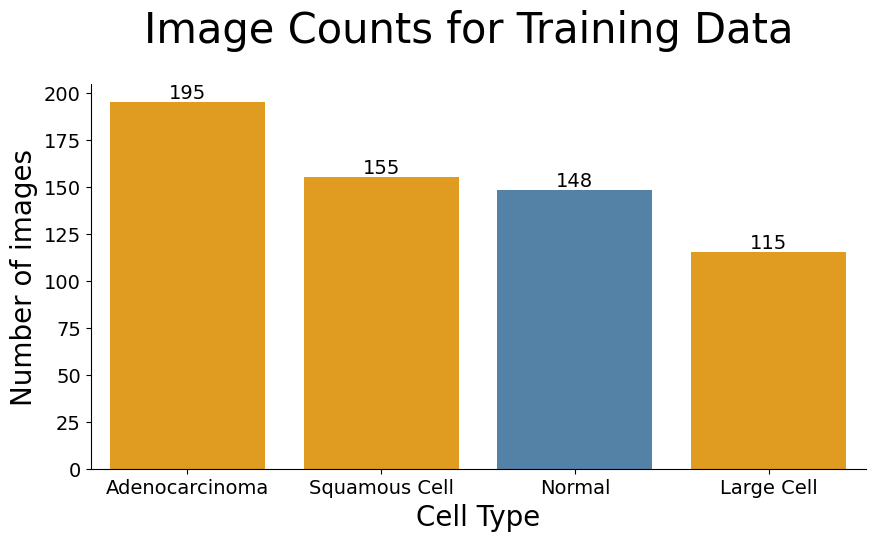

In [ ]:
# visualize data
plt.figure(figsize=(10,5))

plot = sns.countplot(data=train_val_df[train_val_df['set']=='train'], 
              x='type',
              order=train_val_df['type'].value_counts().index,
              palette={'squamous_cell_carcinoma':'orange', 
                     'normal':'steelblue', 
                     'large_cell_carcinoma':'orange',
                     'adeno_carcinoma':'orange'})
plt.title('    Image Counts for Training Data', loc='left', color='black')
plt.xlabel('Cell Type')
plt.xticks(ticks=[0, 1, 2, 3], 
           labels=['Adenocarcinoma', 'Squamous Cell', 'Normal', 'Large Cell'])
plt.ylabel('Number of images')
plot.bar_label(plot.containers[0], color='black', fontsize=14)
plt.show();

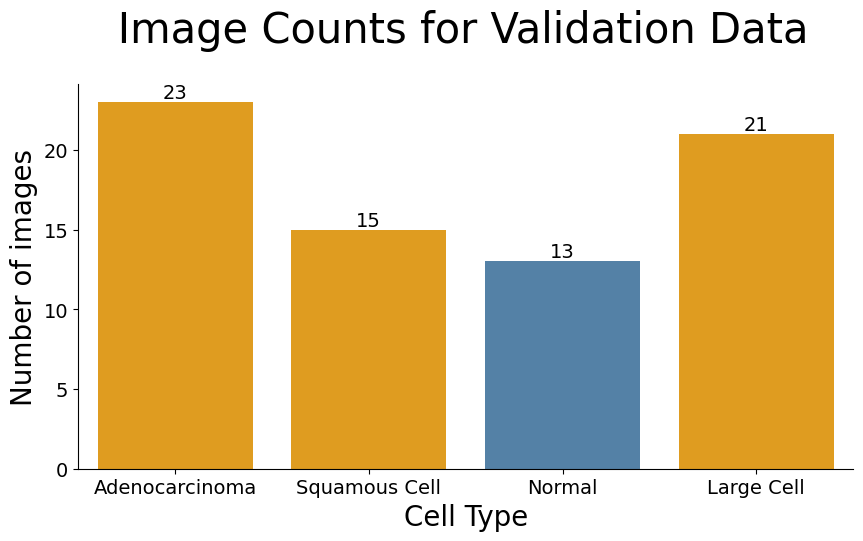

In [ ]:
# A validation set is a sample of data held back from training your model used to give an estimate of model skill while tuning model’s hyperparameters.
plt.figure(figsize=(10,5))
plot = sns.countplot(data=train_val_df[train_val_df['set']=='valid'], 
              x='type',
              order=train_val_df['type'].value_counts().index,
              palette={'squamous_cell_carcinoma':'orange', 
                     'normal':'steelblue', 
                     'large_cell_carcinoma':'orange',
                     'adeno_carcinoma':'orange'})
plt.title('   Image Counts for Validation Data', loc='left', color='black')
plt.xlabel('Cell Type')
plt.xticks(ticks=[0, 1, 2, 3], 
           labels=['Adenocarcinoma', 'Squamous Cell', 'Normal', 'Large Cell'])
plt.ylabel('Number of images')
plot.bar_label(plot.containers[0], color='black', fontsize=14)
plt.show();

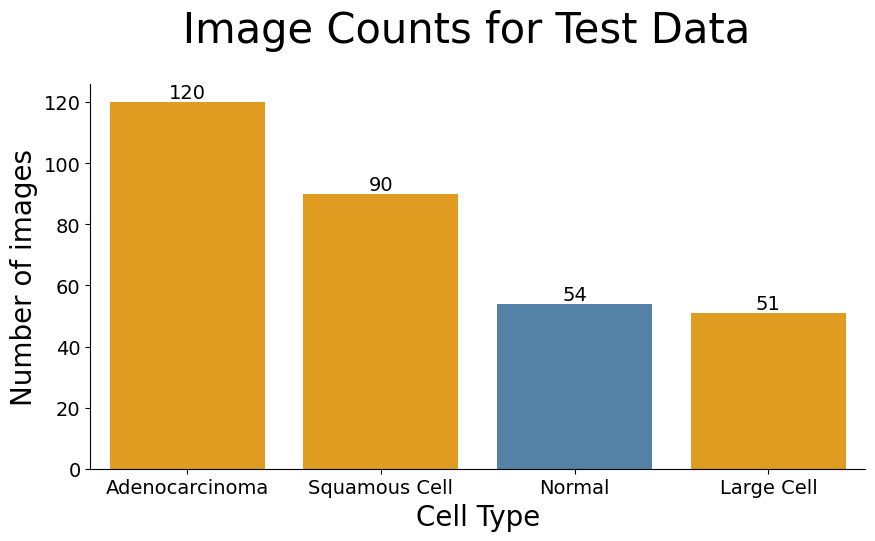

In [ ]:
plt.figure(figsize=(10,5))
plot = sns.countplot(data=test_df[test_df['set']=='test'], 
              x='type',
              order=test_df['type'].value_counts().index,
              palette={'squamous_cell_carcinoma':'orange', 
                     'normal':'steelblue', 
                     'large_cell_carcinoma':'orange',
                     'adeno_carcinoma':'orange'})
plt.title('       Image Counts for Test Data', loc='left', color='black')
plt.xlabel('Cell Type')
plt.xticks(ticks=[0, 1, 2, 3], 
           labels=['Adenocarcinoma', 'Squamous Cell', 'Normal', 'Large Cell'])
plt.ylabel('Number of images')
plot.bar_label(plot.containers[0], color='black', fontsize=14)
plt.show();

It's important we visualize the data distribution because a validation and training data set should be sourced from the same distribution such that the data you use to train will reflect the features the model needs to learn. This reasoning extends to the test data set. 

# View Random Sample Images 


<ipython-input-24-2d89beeb4255>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(file)


RuntimeError: ignored

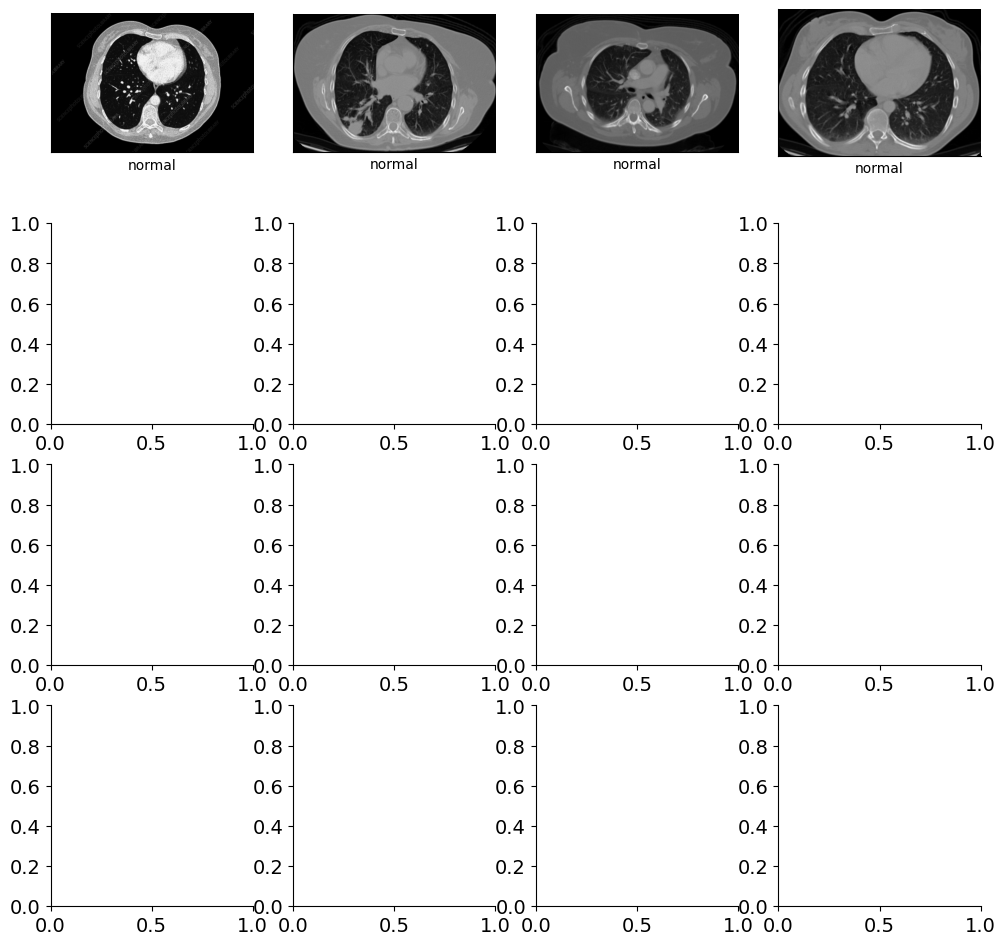

In [ ]:
fig, ax = plt.subplots(4, 4, figsize=(12, 12))
images_to_sample = pd.DataFrame(train_val_df.sample(n=16, random_state=50))
images_to_sample.reset_index(inplace=True)
for i, axis in enumerate(ax.flat):
    if images_to_sample.set[i] == 'train':
        file = str(train_dir +'/'+ images_to_sample.type_extended[i] + '/' + images_to_sample.image[i])
    elif images_to_sample.set[i] == 'valid':
        file = str(valid_dir +'/'+ images_to_sample.type_extended[i] + '/' + images_to_sample.image[i])
    image = imageio.imread(file)
    axis.imshow(image)
    axis.set(xticks=[], yticks=[], xlabel=train_val_df.type[i])
    axis.xaxis.get_label().set_fontsize(10);

###Data Augmentation 

In [ ]:
display(train_val_df)

In [ ]:
train_images = []
for folder in os.listdir(train_dir):
    for file in os.listdir(os.path.join(train_dir,folder)): 
        image_arr = cv2.imread(os.path.join(train_dir,folder,file))
        train_images.append({'image':file, 
                       'type':folder, 
                       'image_dimensions':image_arr.shape,
                       'image_height':image_arr.shape[0],
                       'image_width':image_arr.shape[1],
                       'image_channels':image_arr.shape[2],
                       'set':'train'})
val_images = []     
for folder in os.listdir(valid_dir):
    for file in os.listdir(os.path.join(valid_dir,folder)): 
        image_arr = cv2.imread(os.path.join(valid_dir,folder,file))
        val_images.append({'image':file, 
                       'type':folder, 
                       'image_dimensions':image_arr.shape,
                       'image_height':image_arr.shape[0],
                       'image_width':image_arr.shape[1],
                       'image_channels':image_arr.shape[2],
                       'set':'valid'})

In [ ]:
import pandas as pd
import imgaug.augmenters as iaa

# Load the training data into a Pandas DataFrame

# Define the data augmentor
augmenter = iaa.Sequential([
    iaa.Crop(px=(0, 25)), # crop images from each side by 0 to 25 
    iaa.Flipud(0.5),      # vertically flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # apply gaussian blur with a sigma of 0 to 3.0
])

# Apply the data augmentation pipeline to the entire training data frame
#augmented_train_data = augmenter( images=train_val_df.values[:,0])

"""
augmented_val_images = []
for i in range(len(val_images)): 
  image_info = val_images[i]['image_dimensions']
  augmented_image = augmenter(image = image_info)
  augmented_val_images.append(augmented_image)
"""

"\naugmented_val_images = []\nfor i in range(len(val_images)): \n  image_info = val_images[i]['image_dimensions']\n  augmented_image = augmenter(image = image_info)\n  augmented_val_images.append(augmented_image)\n"

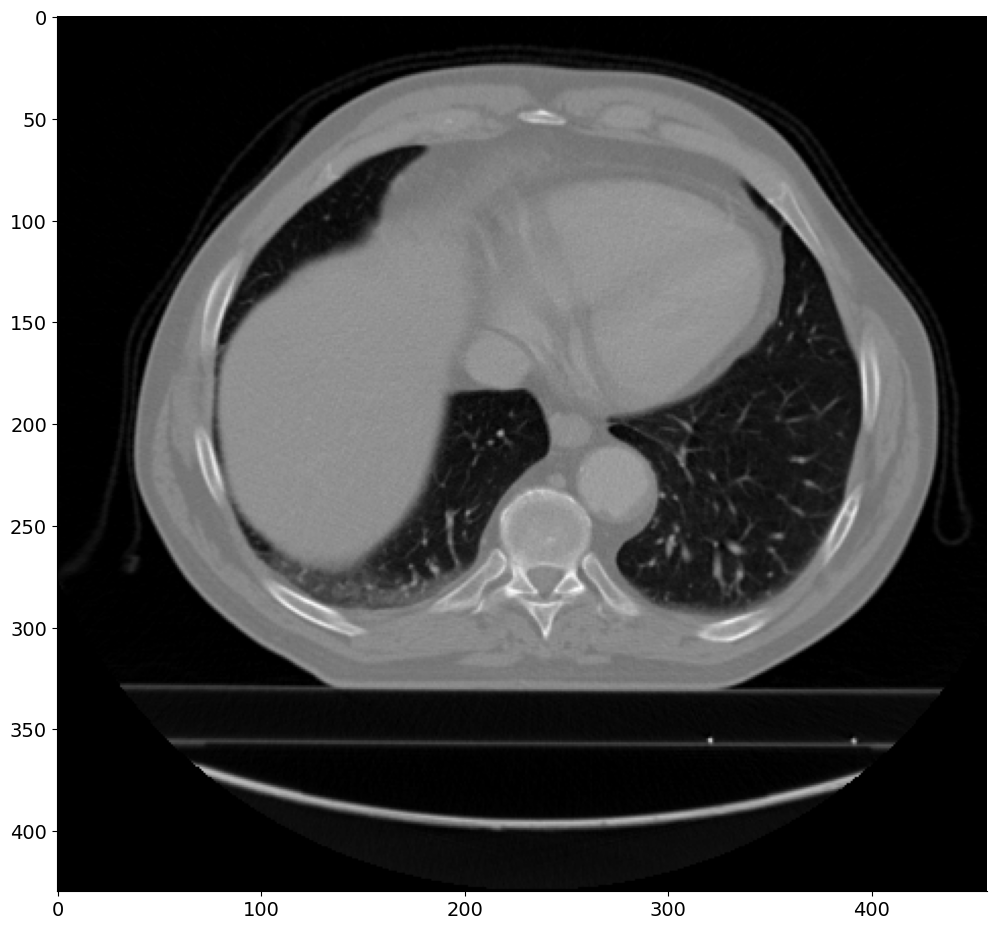

In [ ]:
# Load an image 
plt.imshow(tempVar)

In [ ]:
from skimage import color
from scipy import ndimage as ndi
from matplotlib import patches

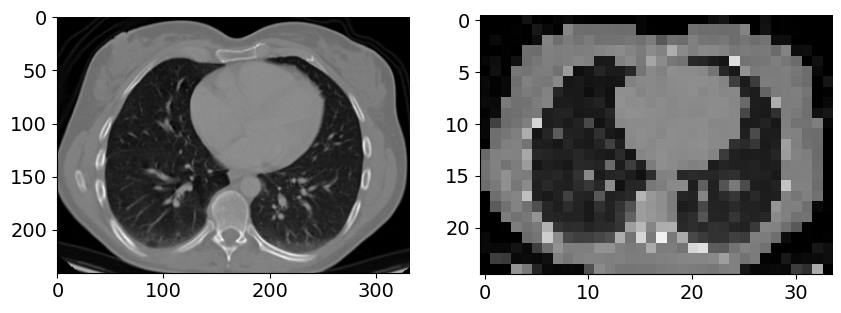

In [ ]:
# Downsampling of Image Function 
def downsampleImage(image, stride): 
  ''' 
  Input: 
  image  - you want to undersample
  stride - the number of rows and columns you want to skip from original image
  '''
  pixelated_image = image[::stride, ::stride] 
  return pixelated_image

# Input Strides (1,2,3,4,5,6,7,8,9,10)
pixelated_image = downsampleImage(image, 2)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.imshow(image)
ax1.imshow(pixelated_image) ;

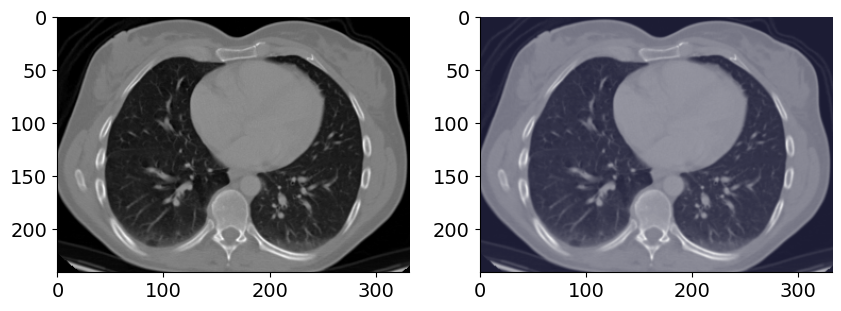

In [ ]:
from skimage import img_as_float
from skimage import filters
# Gaussian Filter of Image Function - will smooth image 
def gaussianFilter(image, sigma): 
  ''' 
  Input: 
  Image -  Your image
  sigma - Standard deviation for Gaussian kernel. 
          The standard deviations of the Gaussian filter are given for each axis as a sequence, 
          or as a single number, in which case it is equal for all axes.
  '''
  image_float = img_as_float(image)
  smooth = filters.gaussian(image_float, sigma = sigma)
  return smooth


smooth_image = gaussianFilter(image, 0.5)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.imshow(image)
ax1.imshow(smooth_image) ;

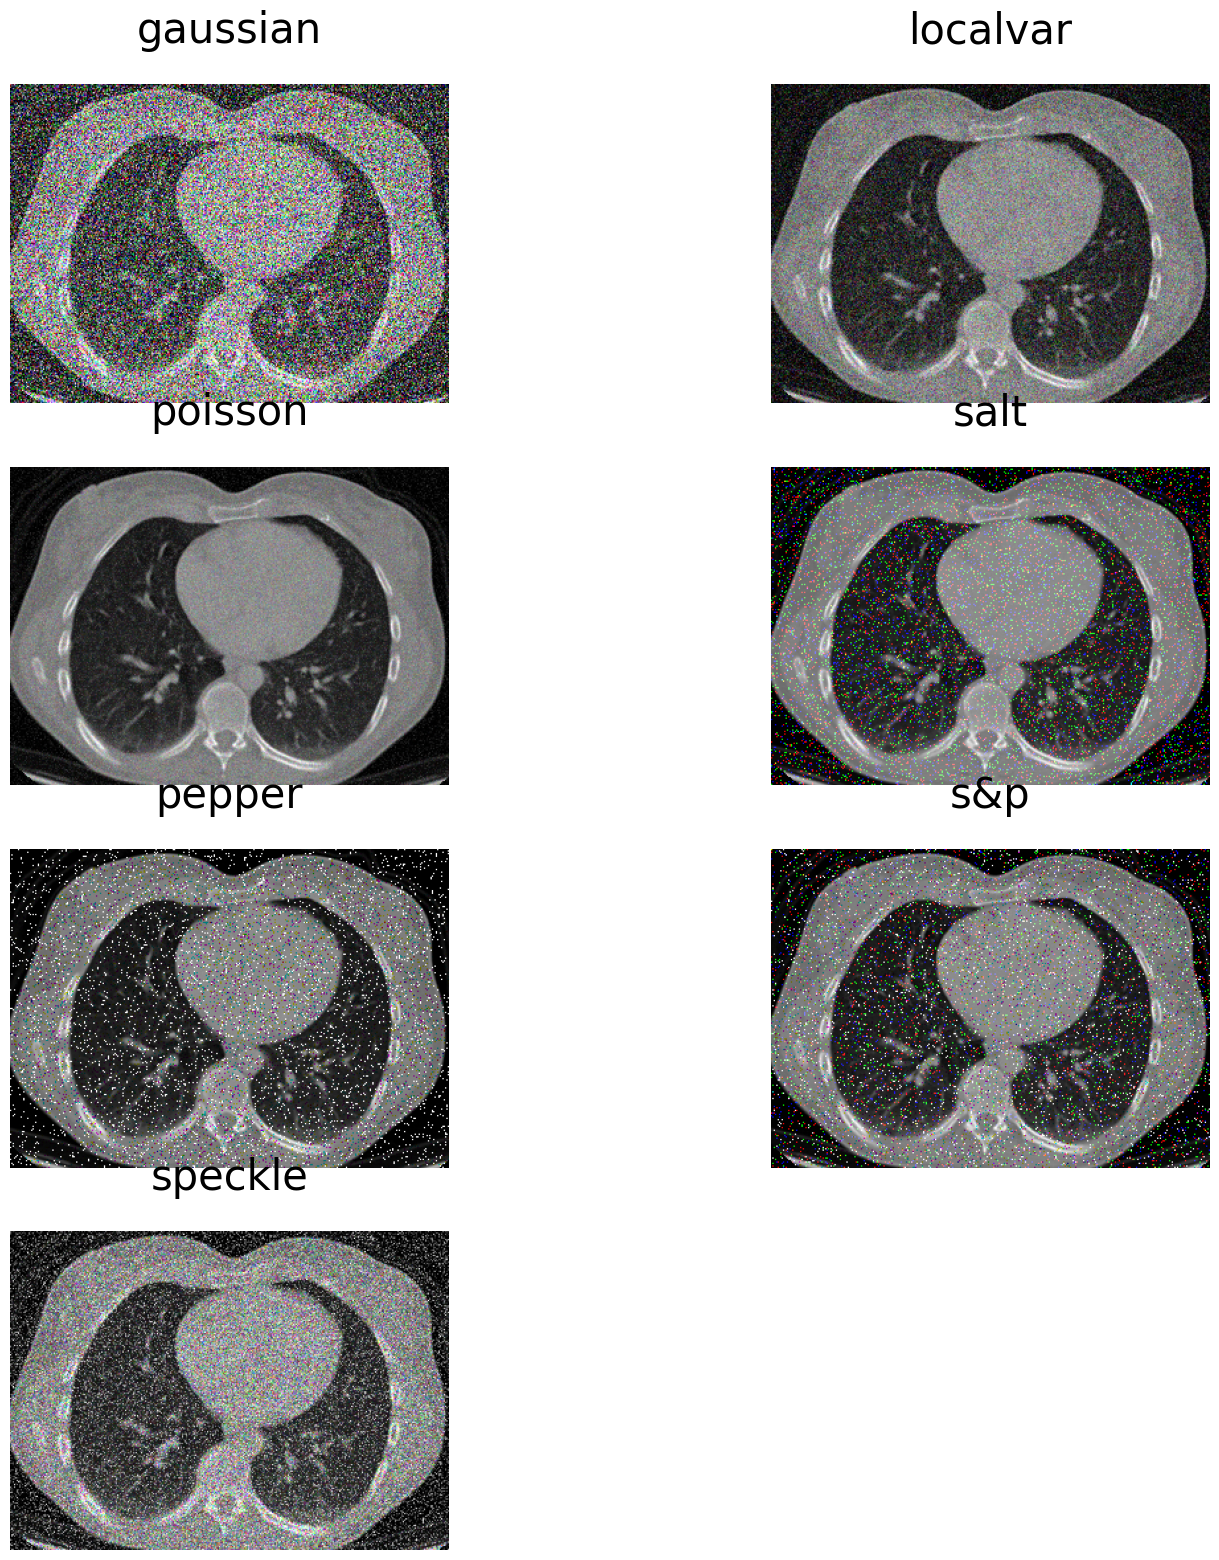

In [ ]:
# Adding Gaussian Noise to image - adapted from https://gist.github.com/Prasad9/28f6a2df8e8d463c6ddd040f4f6a028a

import skimage
import matplotlib.pyplot as plt

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
      if ( (mode == "gaussian") or (mode == "speckle")  ):
        gimg = skimage.util.random_noise(img, mode=mode, var = 0.1)
        plt.imshow(gimg)

      else:   
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=5
c=2
plotnoise(image, "gaussian", r,c,1)
plotnoise(image, "localvar", r,c,2)
plotnoise(image, "poisson", r,c,3)
plotnoise(image, "salt", r,c,4)
plotnoise(image, "pepper", r,c,5)
plotnoise(image, "s&p", r,c,6)
plotnoise(image, "speckle", r,c,7)

plt.show()

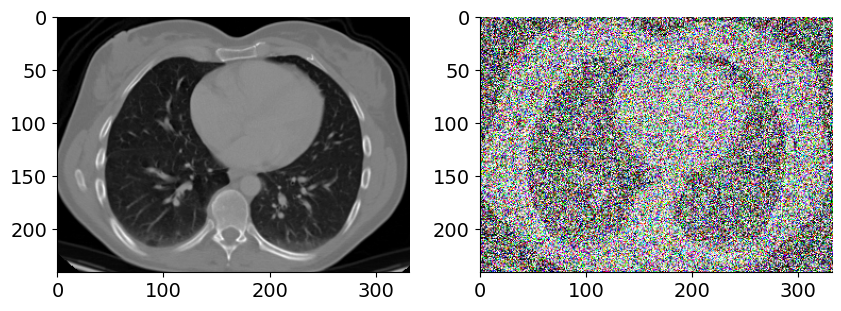

In [ ]:
# Guassian Noise Function 
def gaussianNoise(image, var): 
   gimg = skimage.util.random_noise(image, mode="gaussian", var = var)
   return gimg

var = 0.5
gausianNoiseImage = gaussianNoise(image, var)
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.imshow(image)
ax1.imshow(gausianNoiseImage) ;

In [ ]:
from PIL import ImageEnhance

# Reduce Image contrast 
def ImageContrastAdjustment(image, weight): 
  """
  Inputs - 
  Image: original image 
  weight: 
  weight = 1.0 will preserve the original image
  weight > 1.0 will add contrast to the image
  A value of 0 will return a solid-gray image

  """ 
  filter = ImageEnhance.Contrast(image)
  image.filter(weight)


ImageContrastAdjustment(image, 0.5)

AttributeError: ignored

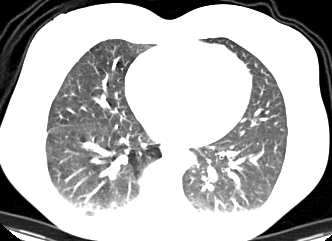

In [ ]:
def Contrast(image, contrast_control,):
  """ 
    image - the original input image.
    alpha - the contrast value. Lower contrast, use 0 < alpha < 1. Higher contrast use alpha > 1.
  """ 
  adjusted = cv2.convertScaleAbs(image, alpha = contrast_control,)
  return adjusted

contrast_control = 4
adjusted = Contrast(image, contrast_control)
# display the output image
cv2_imshow(adjusted)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
from PIL import Image, ImageEnhance
def Brightness(image, brightness_control,):
  """ 
    image - the original input image - accepts .png NOT numpy array .
    beta  - the brightness value. A good range for brightness value is [-127, 127]

  """ 
  image_enhancer = ImageEnhance.Brightness(image)
  adjusted = image_enhancer.enhance(brightness_control)
  return adjusted

brightness_control = 2
# Image needs to be .png or .jpg not numpy array like the other functions 
adjusted = Brightness(image, brightness_control)
cv2_imshow(adjusted)
cv2.waitKey()
cv2.destroyAllWindows()

AttributeError: ignored

Original Image: 


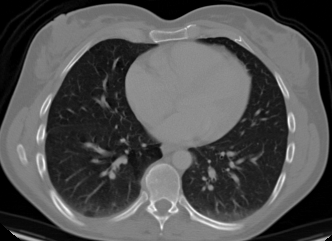

In [ ]:
# Guassian Noise Function for single image 
def gaussianNoiseOneImage(image, mode, var): 
   gimg = skimage.util.random_noise(image = image, mode=mode, var = var)
   plt.imshow(gimg)
   return gimg

print("Original Image: ")
cv2_imshow(image)

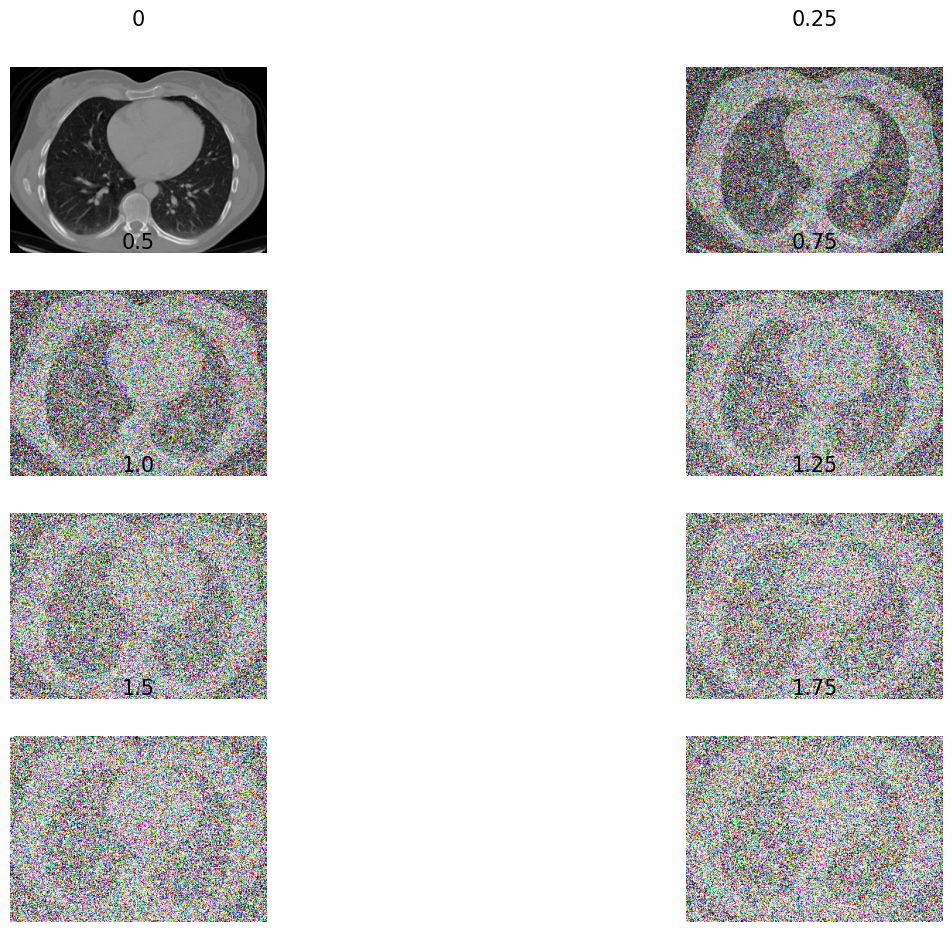

In [ ]:
# Visualizing a single image for different gaussian noise'
def gaussianNoises(image, mode, var, r, c, i): 
   plt.subplot(r,c,i)
   if mode is not None: 
      gimg = skimage.util.random_noise(image = image, mode=mode, var = var)
      plt.imshow(gimg)
   plt.title(var, fontsize = 15)
   plt.axis("off")
   return gimg


plt.figure(figsize=(16,14))
r=5
c=2
# Adjusting Variances
gaussianNoises(image, "gaussian", 0, r, c, 1)
gaussianNoises(image, "gaussian", 0.25, r, c, 2)
gaussianNoises(image, "gaussian", 0.50, r, c, 3)
gaussianNoises(image, "gaussian", 0.75, r, c, 4)
gaussianNoises(image, "gaussian", 1.00, r, c, 5)
gaussianNoises(image, "gaussian", 1.25, r, c, 6)
gaussianNoises(image, "gaussian", 1.50, r, c, 7)
gaussianNoises(image, "gaussian", 1.75, r, c, 8)

plt.show()

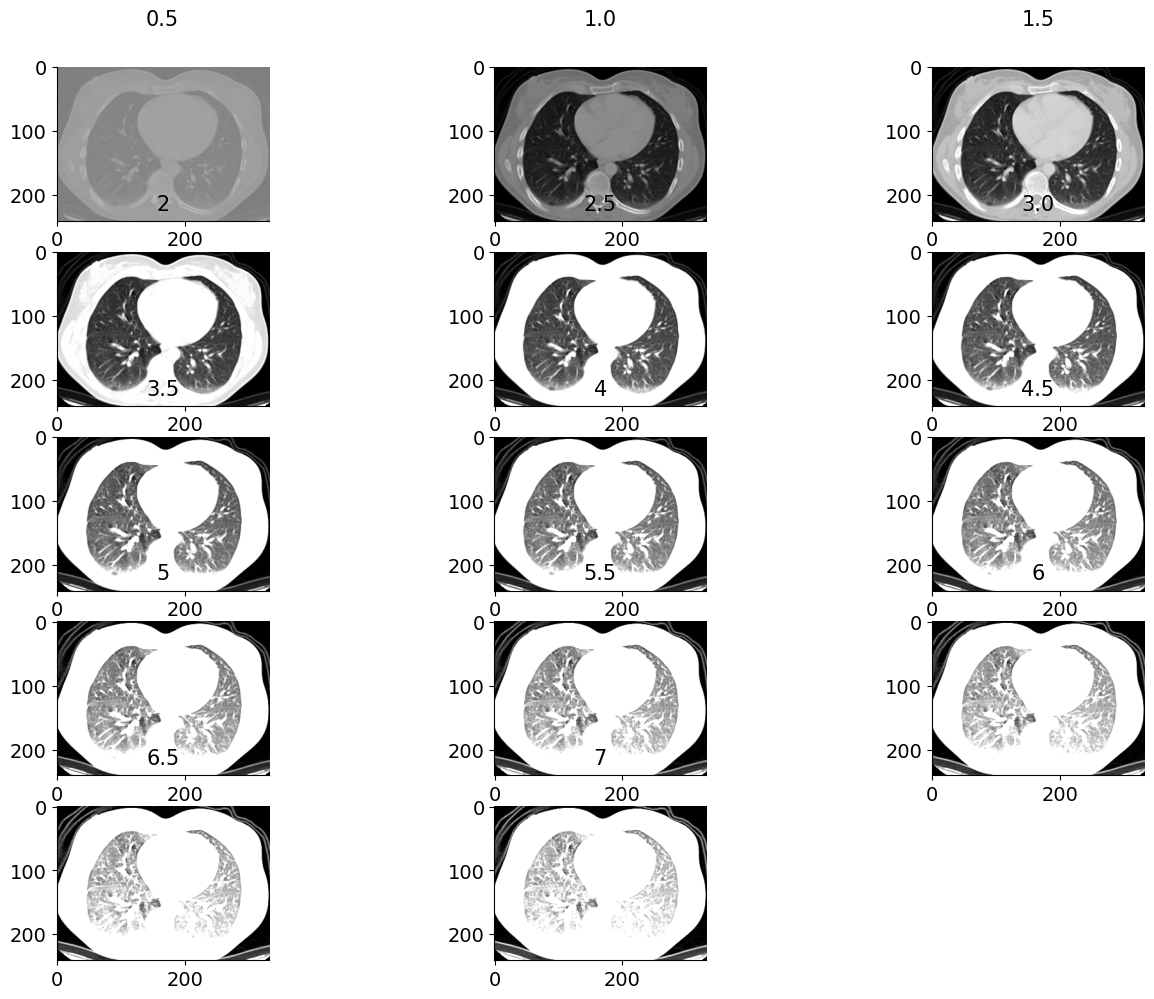

In [ ]:
def DifferingContrasts(image, contrast_control,r,c, i):
  """ 
    image - the original input image.
    alpha - the contrast value. Lower contrast, use 0 < alpha < 1. Higher contrast use alpha > 1.
  """ 
  plt.subplot(r,c,i)
  adjusted = cv2.convertScaleAbs(image, alpha = contrast_control,)
  plt.imshow(adjusted)
  plt.title(contrast_control, fontsize = 15)
  return adjusted

plt.figure(figsize=(16,14))
r=6
c=3
# Adjusting Variances

DifferingContrasts(image, 0.5, r, c, 1)
DifferingContrasts(image, 1.00, r, c, 2)
DifferingContrasts(image, 1.5, r, c, 3)
DifferingContrasts(image, 2, r, c, 4)
DifferingContrasts(image, 2.5, r, c, 5)
DifferingContrasts(image, 3.00,r, c, 6)
DifferingContrasts(image, 3.50 ,r, c, 7)
DifferingContrasts(image, 4 ,r, c, 8)
DifferingContrasts(image, 4.5 ,r, c, 9)
DifferingContrasts(image, 5 ,r, c, 10)
DifferingContrasts(image, 5.5 ,r, c, 11)
DifferingContrasts(image, 6 ,r, c, 12)
DifferingContrasts(image, 6.5 ,r, c, 13)
DifferingContrasts(image, 7 ,r, c, 14)

plt.show()